# Nengo SimData Visualization and Analysis

In [1]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

save2fig = False

matplotlib.rcParams.update({"font.size": 20})
if save2fig:
    matplotlib.rc("xtick", color="white")
    matplotlib.rc("ytick", color="white")
    matplotlib.rc("text", color="white")
else:
    matplotlib.rc("xtick", color="black")
    matplotlib.rc("ytick", color="black")
    matplotlib.rc("text", color="black")

plotpath = "../path"
df = pd.read_csv("../test_data.csv")

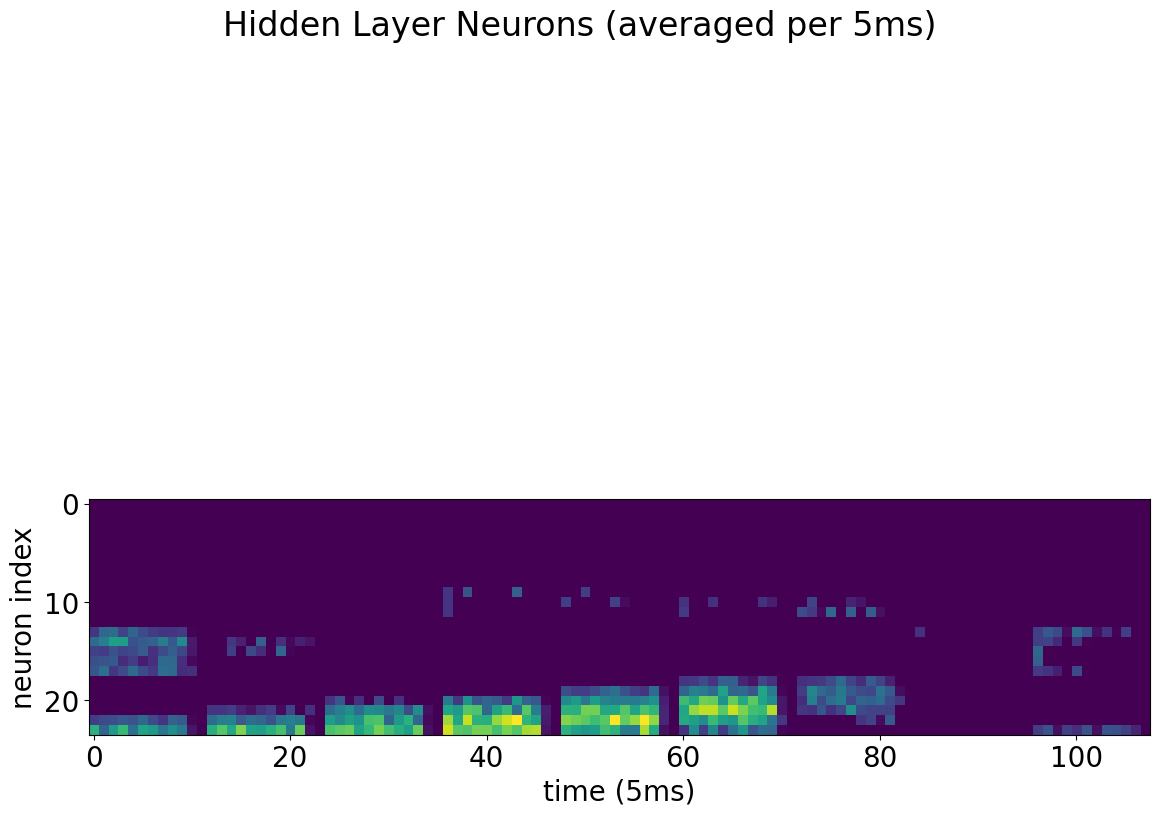

In [3]:
# Plot distribution of the spiking activity every 100 ms
dt = 1e-3
plot_every = int(5e-3 / dt)
mu = []
for i in range(df.shape[0] // plot_every):
    X = df.iloc[i * plot_every : (i + 1) * plot_every].filter(regex="hidden+?")
    mu.append(X.mean(axis=0))

mu = np.asarray(mu).T

fig, axs = plt.subplots(1, 1, figsize=(12, 12))
end = mu.shape[1] // 2
axs.imshow(mu[:, :end])
axs.set_xlabel("time (5ms)")
axs.set_ylabel("neuron index")
plt.suptitle(r"Hidden Layer Neurons (averaged per 5ms)")
plt.tight_layout()

if os.path.isdir(plotpath):
    filepath = os.path.join(plotpath, "hidden_layer.png")
    plt.savefig(filepath, dpi=600, transparent=True)

<Axes: >

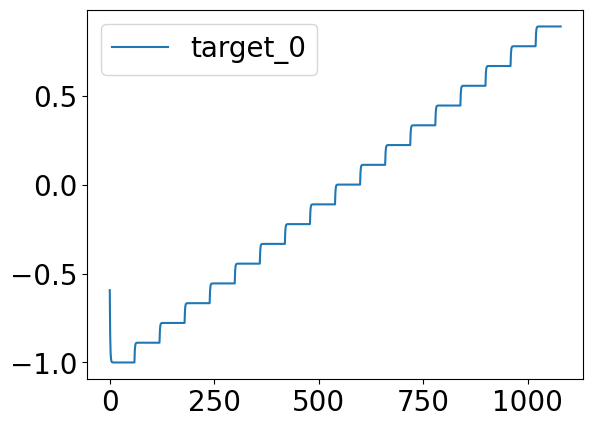

In [4]:
data = df.filter(regex="output").to_numpy()
output = np.argmax(data, axis=1)
target = df.filter(regex="target")
target.plot()

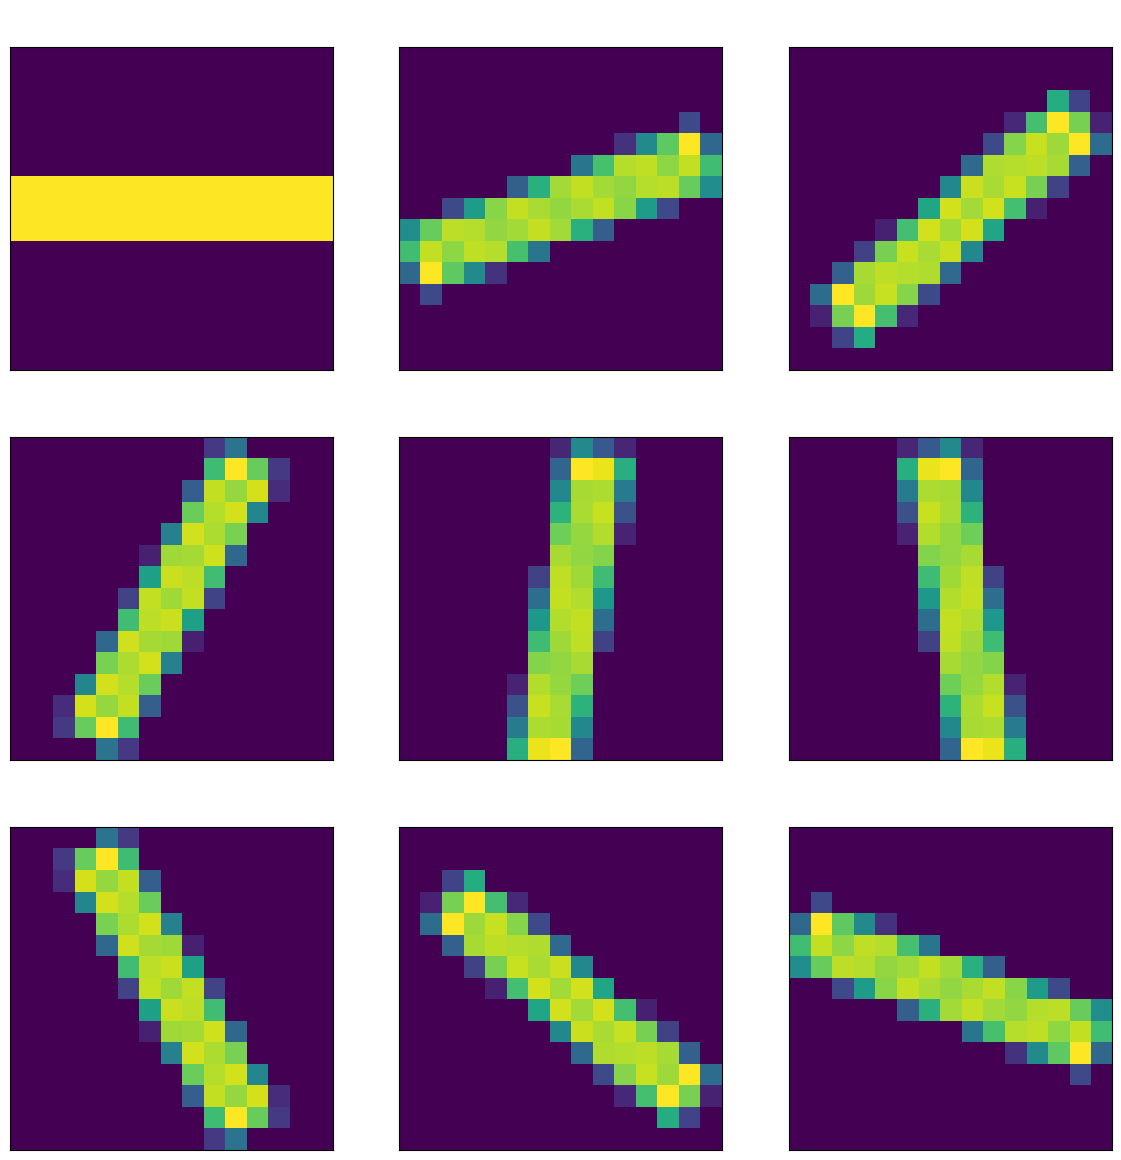

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from BarGenerator import BarGenerator as BG

# Plot generated bars
shape = (15, 15)
bg = BG(shape)
num_samples = 18
bars, tags = bg.gen_sequential_bars(
    num_samples=num_samples,
    dim=(3, 15),
    shift=(0, 0),
    start_angle=0,
    step=360 / num_samples,
)
nrows, ncols = 3, 3
plt.close("all")
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 12))
for i in range(nrows):
    for j in range(ncols):
        index = i * nrows + j
        axs[i, j].imshow(bars[index])
        axs[i, j].set_title(rf"angle {tags[index]}$^\circ$", color="w")
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
plt.tight_layout()

if os.path.isdir(plotpath):
    filepath = os.path.join(plotpath, "bars.png")
    plt.savefig(filepath, dpi=600, transparent=True)

In [12]:
try:
    weights = np.load("../weights.npy")
    nrows, ncols = 2, 5
    phi = 180 / (nrows * ncols)
    fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10))
    index = 0
    for i in range(nrows):
        for j in range(ncols):
            axs[i, j].imshow(weights[0, :, :, 0, index].reshape(5, 5))
            axs[i, j].set_title(rf"angle {phi*index}$^\circ$")
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
            index += 1
    plt.tight_layout()

    if os.path.isdir(plotpath):
        filepath = os.path.join(plotpath, "bipolar_gaussian_rf.png")
        plt.savefig(filepath, dpi=600, transparent=True)
except FileNotFoundError as e:
    print(e)

[Errno 2] No such file or directory: '../weights.npy'


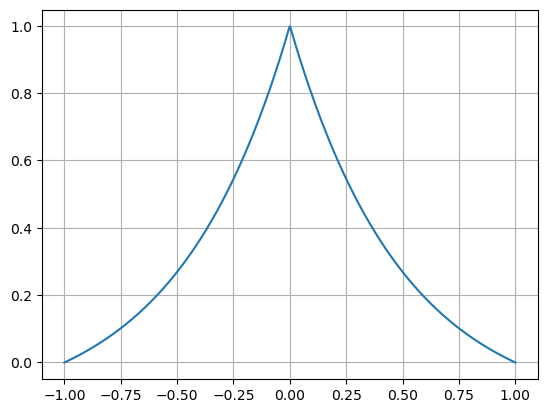

In [4]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 2
beta = np.exp(-alpha)
a = 1/(1-beta)
b = beta/(beta - 1)
x = np.linspace(-1, 1, 1000)
y = a*np.exp(-alpha * np.abs(x)) + b
plt.plot(x, y)
plt.grid()
plt.show()